In [1]:
#Gaussian Transformation
#i know the classification problem, but how to calculate right threshold value

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)
#number of features by default is 20
#n classes is 2, meaning output is 0 and 1
#weights = balanced output

In [3]:

X.shape

(2000, 20)

In [4]:

y
#meaning 1000 rows will be having 1
#1000 rows will be having 0


array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
#Random Forest

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
#i am selecting 1st col which shows probablity of having 0, as shown below
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9825666666666667


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.27, 0.73]])

In [9]:
#Logisitc Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [10]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [11]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [12]:
#Now we will focus on selecting the best threshold for maximum accuracy
#we have been using my threshold value by default as 0.5, in all those four algorithms
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:#these are all models i have created above
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
#i am concatinating all my output values from each model in col wise manner
#then i take all the value of 0th record in the new table as shown below and find the mean 

print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))#calculating my roc score

Ensemble test roc-auc: 0.9846777777777779


In [13]:
 pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.53,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [14]:
final_prediction

0      0.885262
1      0.118323
2      0.816283
3      0.752853
4      0.549947
         ...   
595    0.123840
596    0.112845
597    0.876697
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [15]:
#### Calculate the ROc Curve
#after i get my final_prediction, test it
#for roc, it shows thre values: fpr, tpr, threshold,
#currently displaying threshold values

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90072553, 0.89827475, 0.80876012,
       0.80662833, 0.80134271, 0.8005558 , 0.77923524, 0.77821156,
       0.77637064, 0.77537124, 0.72571832, 0.72387362, 0.70471721,
       0.70393711, 0.64601868, 0.64493537, 0.60462652, 0.60175354,
       0.57577749, 0.57550386, 0.56646627, 0.56236186, 0.55845371,
       0.55469563, 0.54542732, 0.53877948, 0.53615858, 0.51616892,
       0.46700602, 0.44294916, 0.4371034 , 0.37184818, 0.37129719,
       0.34768074, 0.34336612, 0.24583728, 0.24396893, 0.23217239,
       0.23140421, 0.20352808, 0.20348417, 0.11795384, 0.1178351 ,
       0.10625332])

In [16]:
#from above, which threshold value i need to select, should i select: 1.91, 0.900, 0.898 etc
#we use the below code

from sklearn.metrics import accuracy_score

#for each threshold values, whatever prediction is greater than threshold, convert it to 1, or else keep it 0
#then i will append the score, 
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
#the below code is creating a dataframe as shown below
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

#all the accuracy is shown from higher to lower
#below threshold value is combined from all the four models

In [17]:

accuracy_ls

,thresholds,accuracy
31,0.442949,0.961667
32,0.437103,0.960000
30,0.467006,0.960000
29,0.516169,0.958333
27,0.538779,0.958333
28,0.536159,0.956667
26,0.545427,0.956667
25,0.554696,0.956667
24,0.558454,0.956667
23,0.562362,0.955000


In [18]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

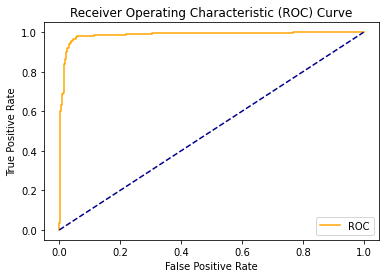

In [19]:
plot_roc_curve(fpr,tpr)